### Сборный проект интернет-магазин "Стимчик"

Цель: <br>выявить закономерности определяющие успешность игры.</br>

Описание данных:
<br>Name — название игры</br>
<br>Platform — платформа</br>
<br>Year_of_Release — год выпуска</br>
<br>Genre — жанр игры</br>
<br>NA_sales — продажи в Северной Америке (миллионы проданных копий)</br>
<br>EU_sales — продажи в Европе (миллионы проданных копий)</br>
<br>JP_sales — продажи в Японии (миллионы проданных копий)</br>
<br>Other_sales — продажи в других странах (миллионы проданных копий)</br>
<br>Critic_Score — оценка критиков (максимум 100)</br>
<br>User_Score — оценка пользователей (максимум 10)</br>
<br>Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.</br>

<b>Открываем файл с данными и изучаем общую информацию</b>

In [1]:
#Импортирую все необходимые библиотеки
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings

warnings.simplefilter('ignore')

In [2]:
#Открываю сам файл 
data =  pd.read_csv('/datasets/games.csv')

In [3]:
#вывожу общую информацию по датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


';'

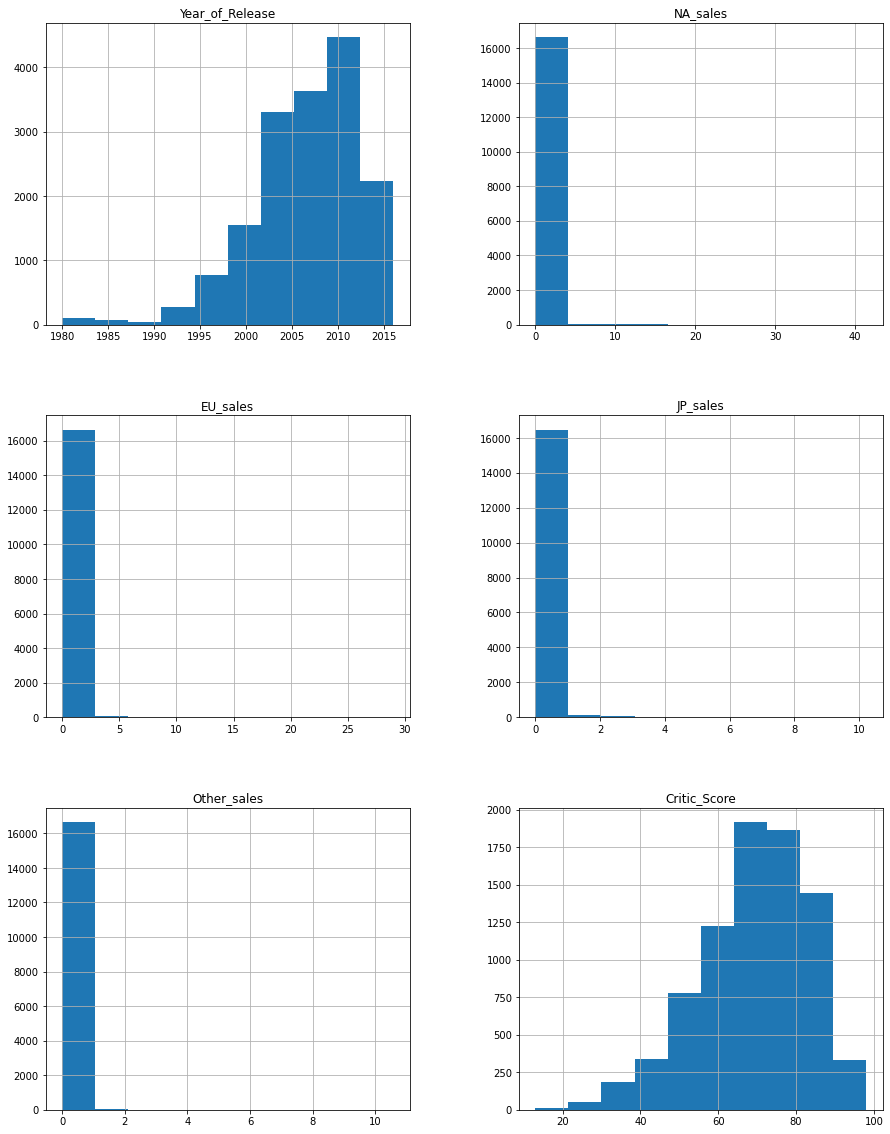

In [4]:
#Строю гитограммы для всех числовых значений датасета 
data.hist(figsize=(15, 20))
";"

In [5]:
#Смотрю сам датасет 
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вывод:
<br>Из общей информации видно что датасет имеет пропуски, так же заметно что есть столбцы с некорректным типом данных.</br>

<b>Подготовка данных</b>

In [39]:
#Привожу названия столбцов к нижнему регистру 

data.rename(columns={"Name": "name", "Platform": "platform",'Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales',
                    'EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score',
                    'User_Score':'user_score','Rating':'rating'})

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [7]:
#Проверим названия столбцов 
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
#Смотрю общее количество пропусков 
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [9]:
#Знаем что всего данных в столбце 16715 и знаем количество пропусков, 
#следовательно можем посчитать количество пропусков в процентном соотношении к значениям столбцов
critic = 8578/16715*100
user = 6701/16715*100
rating = 6766/16715*100
print('Процент пропусков по оценке критиков:',critic)
print('Процент пропусков по оценке пользователей:',user)
print('Процент пропусков по рейтингу:',rating)

Процент пропусков по оценке критиков: 51.31917439425665
Процент пропусков по оценке пользователей: 40.08973975471134
Процент пропусков по рейтингу: 40.478612025127134


In [10]:
data.isna().mean()

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [11]:
#Посмотрим на сами пропуски и попробуем найти видимые закономерности
data.query('critic_score.isna() & rating.isna() & user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Можно ошибочно предположить что старые игры и игры с минимальными продажами не имеют рейтингов. Но видно то что есть и относительно новые игры, и они так же не имеют рейтинга. Возможно тут рольиграет меньшее количество продаж игр по миру. 
Так же предположу что в период с 1980 по примерно 2000 года не существовало игровых критиков и платформ для сбора оценок пользователей, так же погуглив узнал что компания ESRB была основана только в 1995 году, таким образом рейтинга у игр просто не могло быть. Отсюда и большое количество пропусков. 

Так как данных в этих столбцах много заменять их нулями или другими значениями будет не правильно. т.к. они исказят общую картину анализа. По этому решил оставить как есть.

In [12]:
#Посмотрим начения столбца user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Исходя из информации в интернете:"эта аббревиатура не скрывает в себе никаких таинственных смыслов и расшифровывается очень просто - To Be Determined, то есть "Будет определено"". Если оценка не определена значит её просто нет, и т.к. мы уже имеем пустые значения то можно привести TBD к общему виду. 

In [13]:
#Заменяю значения tbd на NaN
data['user_score']  =  data['user_score'].replace('tbd',np.NaN)

In [14]:
#Проверяю что все данные заменились 
data['user_score'].unique()


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Все значения tbd успешно заменены на Nan.

In [15]:
#Меняю тип данных с obj на float
data['user_score'] = data['user_score'].astype('float')
#Проверка
data['user_score']

0        8.0
1        NaN
2        8.3
3        8.0
4        NaN
        ... 
16710    NaN
16711    NaN
16712    NaN
16713    NaN
16714    NaN
Name: user_score, Length: 16715, dtype: float64

Поменял тип на Float c Obj, т.к. в столбце хранятся данные именно этого типа. Так же для более удобного анализа в дальнейшем.

In [16]:
#Меняю тип данных для удобного анализа
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64')

Поменял тип данных на int а не на datatime, т.к. столбец содержит в себе только год выхода игры, без месяца и дня. Так будет удобнее анализировать данные.

In [17]:
year_release = len(data.query('year_of_release > 1980')) / len(data)*100
print('Количество данных в % от всего дата сета без пропусков:',year_release)

Количество данных в % от всего дата сета без пропусков: 98.33682321268323


98 % данных имеем в столбце, и всего примерно 2 % составляют пропуски. Знаем что можно избавиться от пропусков только если количество пропусков будет не более 10 % от общего датасета.

In [18]:
data = data[data['year_of_release'] >= 1980]

В столбце year_of_release есть небольшое количество пропусков, было принято решение избавиться от строк с пропусками. Т.к. количество их незначительно и они практически не повлияют на анализ.

In [19]:
#Проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [20]:
#Смотрю наличие дубликатов в датасете
data.duplicated().sum()

0

In [42]:
#Cуммарные продажи во всех регионах и запись их в отдельный столбец.
data['total_sales'] = data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16446, dtype: float64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16446 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


Вывод: Имеем большое количество пропущеных значений в 3 столбцах, но т.к. у нас нет информации о их заполнении, принято решение работать с минимальным значением данных, нежели с не корректными. Так же поменяли тип данных в столбце год релиза игры на целочисленный для удобного анализа в дальнейшем. В столбце оценки пользователей заменили значение tbd на пустые, потому что это по сути одно и то же. Остальные столбцы имеют нужный тип данных.Дубликатов не имеется в датасете. Данные подготовлены к дальнейшему анализу. 

<b>Исследовательский анализ данных</b>

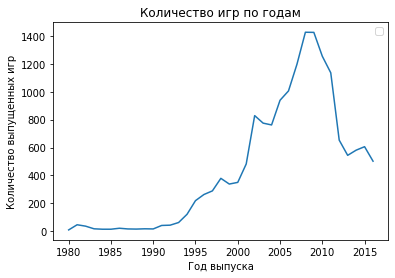

In [44]:
#Количество выпущеных игр по годам
games = data.pivot_table(index='year_of_release',values='platform',aggfunc=['count'])
games.columns = ['count']
games.plot(y='count')
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")
plt.legend('')
plt.show()

In [45]:
games.describe()

,count
count,37.000000
mean,444.486486
std,451.557159
min,9.000000
25%,36.000000
50%,338.000000
75%,762.000000
max,1427.000000


По графику видно что большое количество игр было выпущено в период с 2005 по примерно 2013 год. Это пик игровой индустрии. Тем не менее можно наблюдать спад выпуска игр после 2013 года, пока что это говорит только о нормальном распределении данных. Нужен более глубокий анализ, для выявления закономерностей. Так же думаю, для анализа следует взять не весь период а период с 2006 по 2016 год. т.к. данных куда больше и они актуальней данных 20 летней давности.

In [46]:
#Смотрю уникальные значения столбца с платформами
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

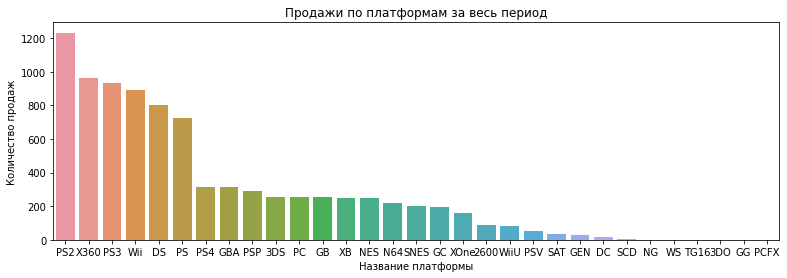

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14


In [47]:
#Строю график по продажам на всех платформах за весь период 
sales_by_platform = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=sales_by_platform.index,y=sales_by_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()
#Посмотрим на топы платформ по сукмме продаж 
top_sales_platform = data.pivot_table(index='platform',values='total_sales',aggfunc=['sum'])
top_sales_platform.columns = ['total_sales']
top_sales_platform.sort_values(by='total_sales',ascending=False).head(7)

По графику видно что, лидерами продаж являются только 6 платформ(PS2","X360","PS3","Wii","DS","PS"). Но пока не понятно с чем это связано. Рискну предположить что платформы с более низкими продажами ориентированы на узкий рынок или вовсе устарели.

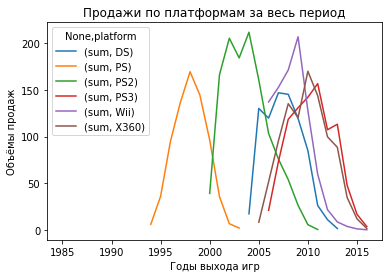

In [48]:
#Платформы с наибольшими суммарными продажами и построение распределения по годам
sales_top_6_platform = data.query('platform in ("PS2","X360","PS3","Wii","DS","PS")').\
pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc=['sum'])

sales_top_6_platform.plot()
plt.title("Продажи по платформам за весь период")
plt.xlabel("Годы выхода игр")
plt.ylabel("Объёмы продаж")
plt.show()

Исходя из данных графика топ платформы имеют явный рост и падение продаж. Это связано с актуализацией самой платформы, тут мы можем предположить продолжительность "жизни", той или иной платформы. Судя по данным, срок "жизни" составляет примерно 10 лет, с момента запуска до момента "исчезновения". Пример PS имеет своё начало в 1994 и свой конец в 2004 году. 

In [49]:
top_6_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).head(6)
top_6_platforms

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Шесть платформ с наибольшем коилчеством продаж.

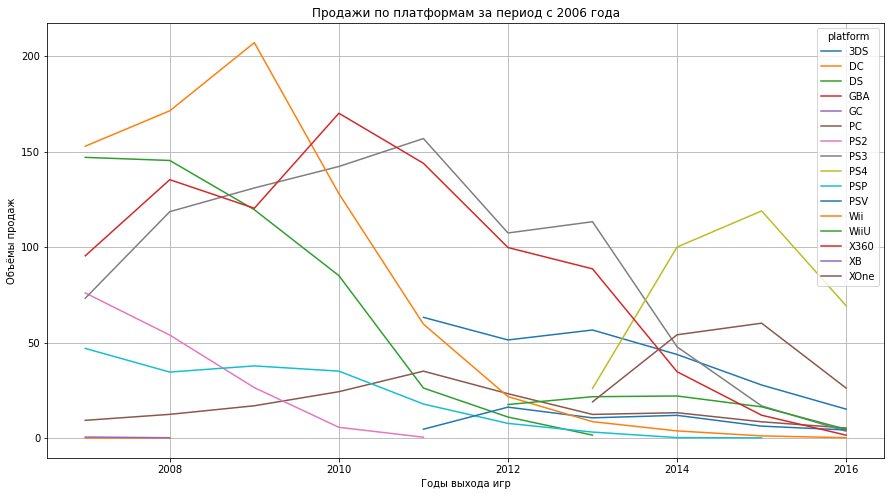

In [50]:
#Определяю актуальный период 
current_period = data.query('year_of_release > 2006').\
pivot_table(index='year_of_release',columns='platform', values='total_sales',aggfunc='sum')

current_period.plot(figsize=(15,8),grid=True)
plt.title("Продажи по платформам за период c 2006 года")
plt.xlabel("Годы выхода игр")
plt.ylabel("Объёмы продаж")
plt.show()

Был определён актуальный период  плаформ по продажам с 2006 по 2016 год., т.к. на графике видно что платформы в этт год имеют большие объёмы продаж, так же видно что в период с 2011 по 2016 год имеется как спад продаж по практически всем платформам, и всего несколько платформ за этот период успели как вырасти так и упасть.Периоды ранее 2006 года думаю брать не стоит т.к. большинство платформ уже "умерло", и они никак не помогут с прогнозом на 2017 год.

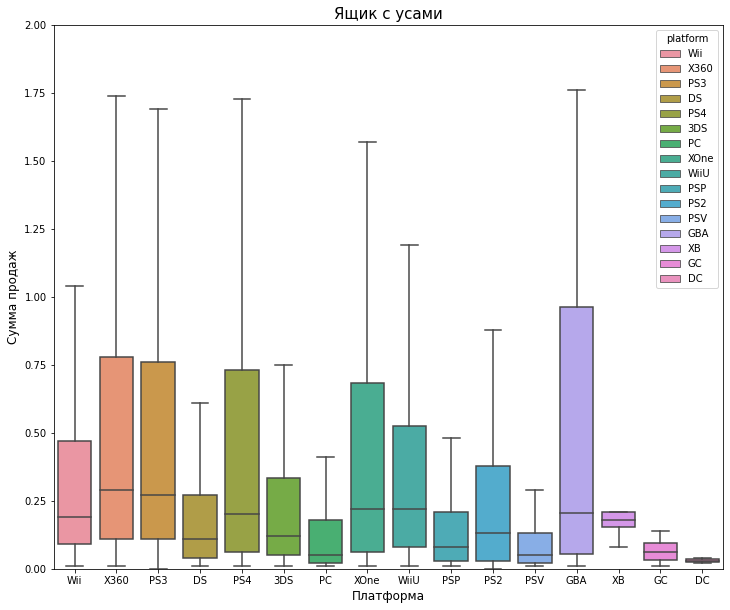

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,9327.000000,9327.000000,9327.000000,9327.000000,9327.000000,4370.000000,4403.000000,9327.000000
mean,2010.489868,0.227784,0.146683,0.052275,0.053510,68.601144,6.793868,0.480252
std,2.676952,0.640091,0.464071,0.226287,0.161043,14.067683,1.508768,1.295254
min,2007.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2008.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.000000,0.050000
50%,2010.000000,0.070000,0.020000,0.000000,0.010000,71.000000,7.100000,0.140000
75%,2012.000000,0.210000,0.110000,0.030000,0.040000,79.000000,7.900000,0.420000
max,2016.000000,15.680000,12.760000,5.650000,3.960000,98.000000,9.500000,35.520000


In [51]:
current_period = data.query('year_of_release > 2006')
plt.figure(figsize=(12,10))
sns.boxplot(data=current_period, x = 'platform' , y = 'total_sales', dodge=False, hue = 'platform',showfliers=False)
plt.ylim(0,2)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
current_period.describe()

Видно что разница в средних продажах на разных платформах не велика. Тем не менее есть как лидеры так и отстающие. К примеру если же ранее в топ 6 по продажам входили такие платформы как (PS2","X360","PS3","Wii","DS","PS"), то сейчас картина чуть изменилась (GBA,XOne,PS4,PS3,X360,WiiU), стали лидерами продаж на данном временном отрезке, а (PS2,DS,Wii) упали в продажах. Хочу отметить что, абсолютным аутсайдером является платформа DC. Платоформа PS вообще пропала с графика, т.к. уже в 2004 году прекратила своё существование.  


In [52]:
#Посмотрим на лидеров продаж среди платформ за актульный период
top_platform_2006 = current_period.pivot_table(index='platform',values='total_sales',aggfunc=['sum'])
top_platform_2006.columns = ['total_sales']
top_platform_2006.sort_values(by='total_sales',ascending=False).head(6)

,total_sales
platform,
PS3,910.38
X360,901.37
Wii,754.03
DS,535.54
PS4,314.14
3DS,257.81


Как и следовало ожидать лидеры продаж поменялись, самой продаваемой платформой стала PS3.
На ее примере посмотрим, как влияют на продажи отзывы пользователей и критиков.

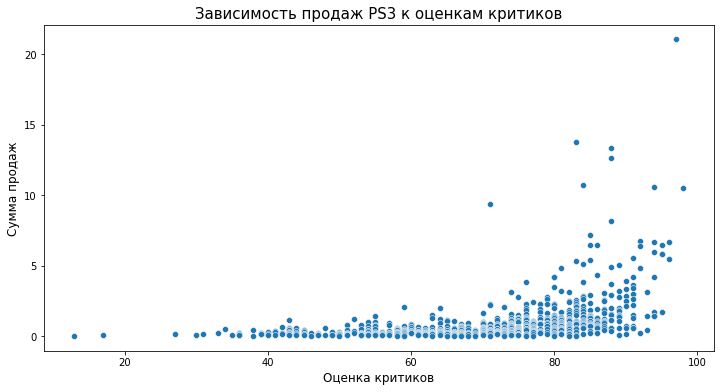

Корреляция: 0.4327589578997135


In [53]:
sales_with_reviews_PS3 = data.query('platform in "PS3"')

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sales_with_reviews_PS3)
plt.title('Зависимость продаж PS3 к оценкам критиков', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
print('Корреляция:',sales_with_reviews_PS3['critic_score'].corr(sales_with_reviews_PS3['total_sales']))

Большое количество продаж имеют игры с рейтингом критиков выше 60 баллов. Так же имеются единичные случаи игр с высокими продажами и одновременно с высоким рейтингом. Корреляция в 0.43 говорит о наличии связи, однако не слишком сильной. Выходит, увеличение оценки сопровождается прибавкой в продажах.

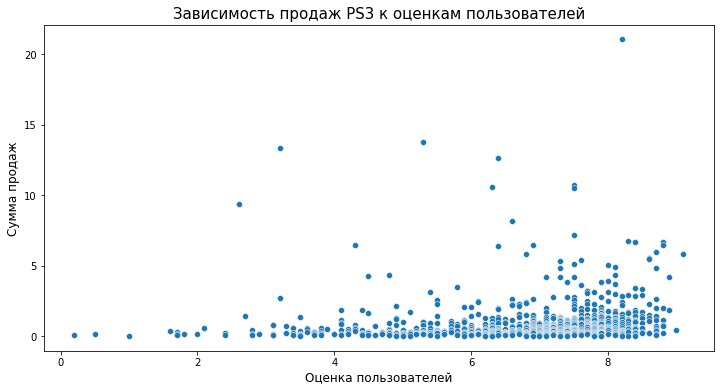

Корреляция: 0.12841562938563006


In [54]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sales_with_reviews_PS3)
plt.title('Зависимость продаж PS3 к оценкам пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
print('Корреляция:',sales_with_reviews_PS3['user_score'].corr(sales_with_reviews_PS3['total_sales']))

Большое количество продаж имеют игры с рейтингом пользователей выше 6 баллов. Так же имеются единичные случаи игр с высокими продажами и одновременно с высоким рейтингом. Корреляция в 0.12 говорит о наличии связи, однако не сильной. Выходит, увеличение оценки сопровождается увеличением продаж.

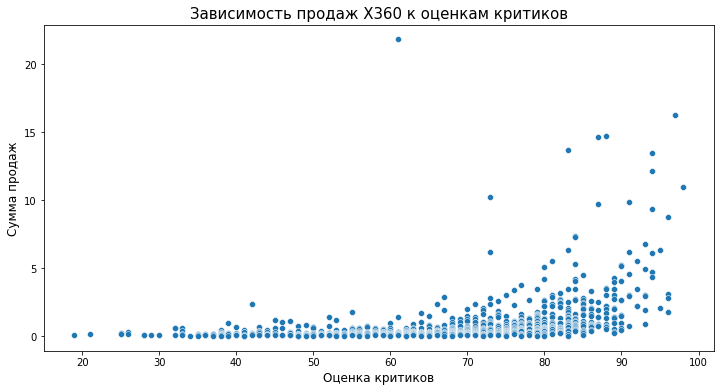

Корреляция: 0.39286589254006954


In [55]:
sales_with_reviews_X360 = data.query('platform in "X360"')

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sales_with_reviews_X360)
plt.title('Зависимость продаж X360 к оценкам критиков', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
print('Корреляция:',sales_with_reviews_X360['critic_score'].corr(sales_with_reviews_X360['total_sales']))

На платформе X360, практичести аналогичная история с продажами и оценками. Кореляция не сильно отличается от графика с PS3. Чем выше оценка тем выше продажи. 

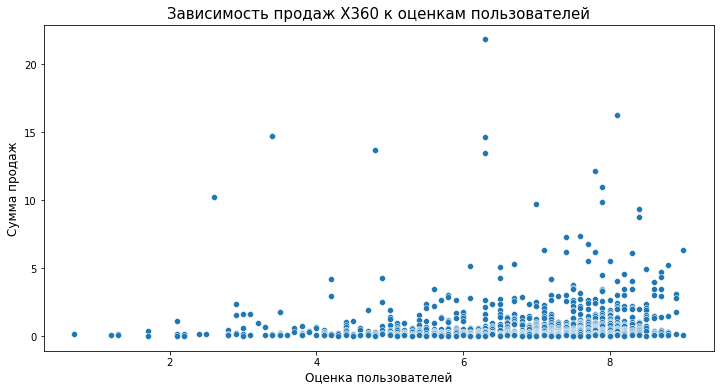

Корреляция: 0.11418661214018049


In [56]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sales_with_reviews_X360)
plt.title('Зависимость продаж X360 к оценкам пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
print('Корреляция:',sales_with_reviews_X360['user_score'].corr(sales_with_reviews_X360['total_sales']))

Как и описывал выше можно сделать те же выводы что и при рассмотрении платформы PS3. Пользователи предпочитают больше игры с оценкой выше 6 баллов. 

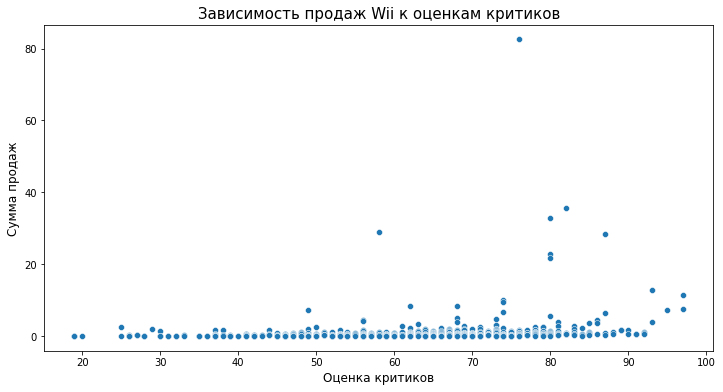

Корреляция: 0.17790728577594908


In [57]:
sales_with_reviews_Wii = data.query('platform in "Wii"')

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sales_with_reviews_Wii)
plt.title('Зависимость продаж Wii к оценкам критиков', fontsize=15)
plt.xlabel('Оценка критиков', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=12)
plt.show()
print('Корреляция:',sales_with_reviews_Wii['critic_score'].corr(sales_with_reviews_Wii['total_sales']))

Картина с Wii куда отличается от платформ PS3 и X360. Кореляция практически ниже 2 раза, так же сильное изменение по продажам благодаря оценкам критиков не отслеживается, тем не менее можно сказать что начиная примерно с 45 балов, есть едва заметный рост продаж. 

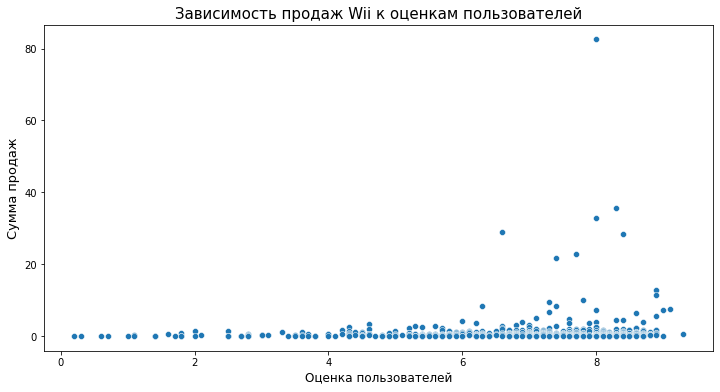

Корреляция: 0.11283121360773772


In [58]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sales_with_reviews_Wii)
plt.title('Зависимость продаж Wii к оценкам пользователей', fontsize=15)
plt.xlabel('Оценка пользователей', fontsize=12)
plt.ylabel('Сумма продаж',fontsize=13)
plt.show()
print('Корреляция:',sales_with_reviews_Wii['user_score'].corr(sales_with_reviews_Wii['total_sales']))

Кореляция низкая взаимосвязь в уеличении оценки пользователей и количества продаж есть, но она едва заметна. Возможно следует посмотреть на регион распространения игр данной платформы. 

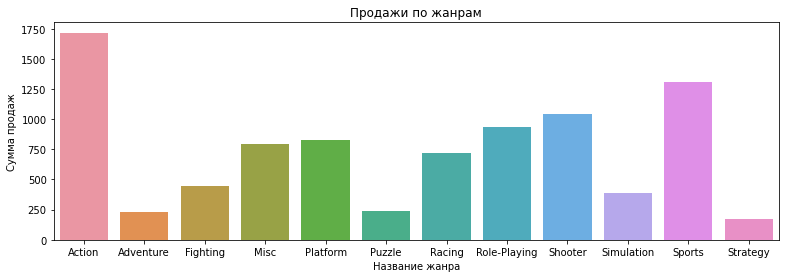

In [64]:
#Посмотрим продажи по жанрам игр
games_genre = data.pivot_table(index='genre', values='total_sales',aggfunc=['sum'])
games_genre.columns = ['total_sales']
games_genre.sort_values(by='total_sales',ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=games_genre.index,y=games_genre['total_sales'])
plt.title("Продажи по жанрам")
plt.xlabel("Название жанра")
plt.ylabel("Сумма продаж")
plt.show()

Наиболее популярные жанры action,sports,shooter,role-playing. Данные жанры имеют большое количество продаж. Посмотрим на популярные жанры в дазных регионах и попробуем составить портрет пользователя.

<b>Составляем портрет пользователя</b>

In [ ]:
top_5_sales_na = data.pivot_table(index='platform', values='na_sales',aggfunc='sum')

games_platform_sales_na = data.pivot_table(index='platform', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x=games_platform_sales_na.index,y=games_platform_sales_na['na_sales'])
plt.title("Продажи по платформам в Северной Америке")
plt.xlabel("Название платформ")
plt.ylabel("Сумма продаж")
plt.show()

top_5_sales_na.sort_values(by='na_sales',ascending=False).head(5)


Пользователи в Северной Америке больше предпочитают платформы x360, ps2,wii,ps3,ds,ps. Об этом свидетельствует большое количество продаж.

In [ ]:
top_5_sales_eu = data.pivot_table(index='platform', values='eu_sales',aggfunc='sum')

games_platform_sales_eu = data.pivot_table(index='platform', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x=games_platform_sales_eu.index,y=games_platform_sales_eu['eu_sales'])
plt.title("Продажи по платформам в Европе")
plt.xlabel("Название платформы")
plt.ylabel("Сумма продаж")
plt.show()

top_5_sales_eu.sort_values(by='eu_sales',ascending=False).head(5)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются. 
    
Это говорит о том, что мы можем создать функцию для построения расчетов и применить цикл `for`.
    
</div>

В Европе аналогичная ситуация как и в Северной Америке. Большое предпочтение пользователи отдают совершенно тем же платформам x360, ps2,wii,ps3,ds,ps.

In [ ]:
top_5_sales_jp = data.pivot_table(index='platform', values='jp_sales',aggfunc='sum')

games_platform_sales_jp = data.pivot_table(index='platform', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x=games_platform_sales_jp.index,y=games_platform_sales_jp['jp_sales'])
plt.title("Продажи по платформам в Японии")
plt.xlabel("Название платформ")
plt.ylabel("Сумма продаж")
plt.show()

top_5_sales_jp.sort_values(by='jp_sales',ascending=False).head(5)

В Японии картина отличается тут лидирующие позиции занимают такие платформы как ds,ps,ps2,snes,3ds,nes.

In [ ]:
top_5_sales_other = data.pivot_table(index='platform', values='other_sales',aggfunc='sum')

games_platform_sales_other = data.pivot_table(index='platform', values='other_sales',aggfunc='sum').sort_values(by='other_sales',ascending=False)
plt.figure(figsize=(13,5))
sns.barplot(x=games_platform_sales_other.index,y=games_platform_sales_other['other_sales'])
plt.title("Продажи по платформам в других регионах")
plt.xlabel("Название платформ")
plt.ylabel("Сумма продаж")
plt.show()

top_5_sales_other.sort_values(by='other_sales',ascending=False).head(5)

В других регионах те же лидирующие платформы что и в Северной Америке и Европе.

In [ ]:
top_5_genre_na = data.pivot_table(index='genre', values='na_sales',aggfunc='sum')

games_genre_sales_na = data.pivot_table(index='genre', values='na_sales',aggfunc='sum').sort_values(by='na_sales',ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=games_genre_sales_na.index,y=games_genre_sales_na['na_sales'])
plt.title("Продажи по жанрам в Cеверной Америке")
plt.xlabel("Название жанра")
plt.ylabel("Сумма продаж")
plt.show()

top_5_genre_na.sort_values(by='na_sales',ascending=False).head(5)

In [ ]:
top_5_genre_eu = data.pivot_table(index='genre', values='eu_sales',aggfunc='sum')

games_genre_sales_na = data.pivot_table(index='genre', values='eu_sales',aggfunc='sum').sort_values(by='eu_sales',ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=games_genre_sales_na.index,y=games_genre_sales_na['eu_sales'])
plt.title("Продажи по жанрам в Европе")
plt.xlabel("Название жанра")
plt.ylabel("Сумма продаж")
plt.show()

top_5_genre_eu.sort_values(by='eu_sales',ascending=False).head(5)

In [ ]:
top_5_genre_jp = data.pivot_table(index='genre', values='jp_sales',aggfunc='sum')

games_genre_sales_na = data.pivot_table(index='genre', values='jp_sales',aggfunc='sum').sort_values(by='jp_sales',ascending=False)
plt.figure(figsize=(13,4))
sns.barplot(x=games_genre_sales_na.index,y=games_genre_sales_na['jp_sales'])
plt.title("Продажи по жанрам в Японии")
plt.xlabel("Название жанра")
plt.ylabel("Сумма продаж")
plt.show()

top_5_genre_jp.sort_values(by='jp_sales',ascending=False).head(5)

В Северной америке Европе и других регионах, лидирующие позиции продаж занимают жанры Action,Sports,Shooter,Racing,Misc и Platform. В Японии же с огромным отрывомпо количеству продаж вырывается платформа Role-playing, и далее Action,Sports,Platform,Misc. Давайте посмотрим на то как влияют рейтинги ESRB на продажи в отдельных регионах.

In [ ]:
sales_from_ranking_na = data.pivot_table(index='rating',values='na_sales',aggfunc='sum').sort_values(by='na_sales', ascending=False)

sales_from_ranking_na.plot(figsize=(15,8),grid=True)
plt.title("Зависимость продаж в северной Америке от рейтинга ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Объёмы продаж")
plt.show()

sales_from_ranking_na


In [ ]:
sales_from_ranking_eu = data.pivot_table(index='rating',values='eu_sales',aggfunc='sum').sort_values(by='eu_sales', ascending=False)

sales_from_ranking_eu.plot(figsize=(15,8),grid=True)
plt.title("Зависимость продаж в Европе от рейтинга ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Объёмы продаж")
plt.show()
sales_from_ranking_eu

In [ ]:
sales_from_ranking_jp = data.pivot_table(index='rating',values='jp_sales',aggfunc='sum').sort_values(by='jp_sales', ascending=False)

sales_from_ranking_jp.plot(figsize=(15,8),grid=True)
plt.title("Зависимость продаж в Японии от рейтинга ESRB")
plt.xlabel("Рейтинг ESRB")
plt.ylabel("Объёмы продаж")
plt.show()

sales_from_ranking_jp

Лидерами продаж во всех регионах выступают игры с рейтингом:
<br>«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.</br>
<br>«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.</br>
<br>«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.</br>
<br>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».</br>

<b>Проверка гипотез</b>

<b>Гипотеза 1</b><br>
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;</br>

H0:Рейтинг пользователей Xbox One = рейтинг пользователей PC
<br>H1:Рейтинг пользователей Xbox One ≠ рейтинг пользователей PC
</br>
<br>alpha = 0.05</br>

In [ ]:
#Отбрасываю из датасета значения nan
rating_users = data[data['user_score'] > 0]

results = st.ttest_ind(rating_users[rating_users['platform'] =='XOne']['user_score'], rating_users[rating_users['platform'] =='PC']['user_score'])

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')


Получив p-value, мы отвергли Нулевую гипотезу. Таким образом, средние пользовательские рейтинги платформ Xbox One и PC статистически отличаются.

<b>Гипотеза 2</b>
<br>Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.</br>

H0:Пользовательский рейтинг жанра Action = пользовательский рейтинг жанра Sports
<br>H1:Пользовательский рейтинг жанра Action ≠ пользовательский рейтинг жанра Sports
</br><br>
alpha = 0.05</br>

In [ ]:
results = st.ttest_ind(rating_users[rating_users['genre'] =='Action']['user_score'], rating_users[rating_users['genre'] =='Sports']['user_score'])

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports отвергнуть не удалось.

<b>Шаг 6 Общий вывод.</b>

В результате работы с исходными данными было выполнено следующее:

Привели данные исходного датасета к удобному виду. Выполнена работа с удалением пропусков, приведением датасета к единому регистру. Так же в ряде столбцов были изменены типы данных.

Так как датасет имеет большое количество пропусков, было принято решение работать с ними, т.к. до конца не понятна их природа. И если бы мы удалили пропуски, в дальнейшем анализе результаты были бы искажены.
Добавили в таблицу дополнительный столбец с общим количеством продаж по всем регионам total_sales.

Пик количества выпущеных игр относится к периоду с 2005 по 2012 год. В среднем за весь период в год выпускалось примерно по 500 игр. Выяснили время "жизни" игровой платформы, этот период равен примерно 10 годам. Всвязи с этим для точного анализа брали период последних 10 лет, с 2006 по 2016 год. Данные для анализа по составлению портрета пользователя за более давний период не нужны так как потеряли свою актуальность. 

Лидерами продаж за весь период являются платформы PS2,X360,PS3,Wii,DS,PS.<br>
А за актуальный период времени с 2006 по 2016 год PS3,X360,Wii,DS,PS4,3DS.</br>

В Северной Америке популярными жанрами и платформами являются:<br>

Жанры</br>
<br>Action с продажами в 879.01 млн.</br>
<br>Sports с продажами в 	684.43 млн.</br>
<br>Shooter	с продажами в 592.24 млн.</br>
<br>Platform с продажами в 445.50 млн.</br>
<br>Misc с продажами в 407.27 млн.</br>

<br>
Платформы</br>
<br>X360 с продажами в 602.47 млн.</br>
<br>PS2 с продажами в 583.84 млн.</br>
<br>Wii	с продажами в 496.90 млн.</br>
<br>PS3 с продажами в 393.49 млн.</br>
<br>DS с продажами в 382.40 млн.</br>	

В Европе популярными жанрами и предпочитаемыми платформами являются:
<br>Жанры</br>
<br>Action с продажами в 519.13 млн.</br>
<br>Sports с продажами в 376.79	млн.</br>
<br>Shooter	с продажами в 317.34 млн.</br>
<br>Racing с продажами в 236.51 млн.</br>
<br>Misc с продажами в 212.74 млн.</br>

<br>
Платформы</br>
<br>PS2 с продажами в 339.29 млн.</br>
<br>PS3 с продажами в  330.29млн.</br>
<br>X360 с продажами в 270.76 млн.</br>
<br>Wii с продажами в 262.21 млн.</br>
<br>PS с продажами в 213.61 млн.</br>

В Японии популярными жанрами и предпочитаемыми платформами являются:
<br>Жанры</br>
<br>Role-Playing с продажами в 355.41 млн.</br>
<br>Action с продажами в 161.43 млн.</br>
<br>Sports	с продажами в 135.54 млн.</br>
<br>Platform с продажами в 130.83 млн.</br>
<br>Misc с продажами в 108.11 млн.</br>

<br>
Платформы</br>
<br>DS с продажами в 175.57 млн.</br>
<br>PS с продажами в 139.82 млн.</br>
<br>PS2	с продажами в 139.20 млн.</br>
<br>SNES с продажами в 116.55 млн.</br>
<br>3DS с продажами в 100.67 млн.</br>

Так же выяснили что  Европе и Северной Америке имеются закономерности количества продаж от оценок критиков и пользовательских оценок. В среднем в обоих регионах цифры похожи. Если в случае с оценкой критика значение с наибольшим количеством продаж равно более 60. А в случае с оценкой пользователей это значение равно более 6. В то время как в Японии резкую тенденцию и зависимости уже стёрты, и рост продаж начинается от 45 по рейтингу критиков и от 4  по рейтингу пользователей. Из этого следует что, если игра получит высокую оценку критиков и пользователей, то будет продана в большом количестве.

Однозначно популярностью пользуются игры во всех регионах с одними и теми же рейтингами организации ESRB. Как оказалось это игры с рейтингами:
<br>«E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов.</br>
<br>«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет.</br>
<br>«M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.</br>
<br>«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».</br>

<br>Игры с остальными рейтингами практически не пользуются спросом.</br>


Абсолютный лидер среди жанров по объему продаж - Action, да и в целом игры активных жанров (Action, Sports, Shooter) более популярны. А вот пазлы (головоломки, стратегии) и симуляторы замыкают рейтинг продаж.

Проверка гипотезы о равенстве средних пользовательских оценок для платформ Xone и PC показала, что статистически они отличаются;

Напротив, не обнаружилось оснований полагать, что средние пользовательские оценки жанров Action и Sports статистически различны - наоборот, они совпадают с высокой долей вероятности.